# Lab08 - Bài tập

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

### Bài 1

Nghiên cứu mức thu nhập ($X$) và chi tiêu ($Y$) trong một tháng của một công ty. Khảo sát ngẫu nhiên 7 nhân viên, ta thu được bảng số liệu sau:

| X            | 130     | 150      | 133      | 170      | 170      | 210      | 230      |
| :----------: | :-----: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **84**  | **120**  | **108**  | **130**  | **130**  | **150**  | **160**  |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính chi tiêu dựa theo thu nhập

b. Dự đoán mức chi tiêu của nhân viên công ty trên nếu biết thu nhập là 200$

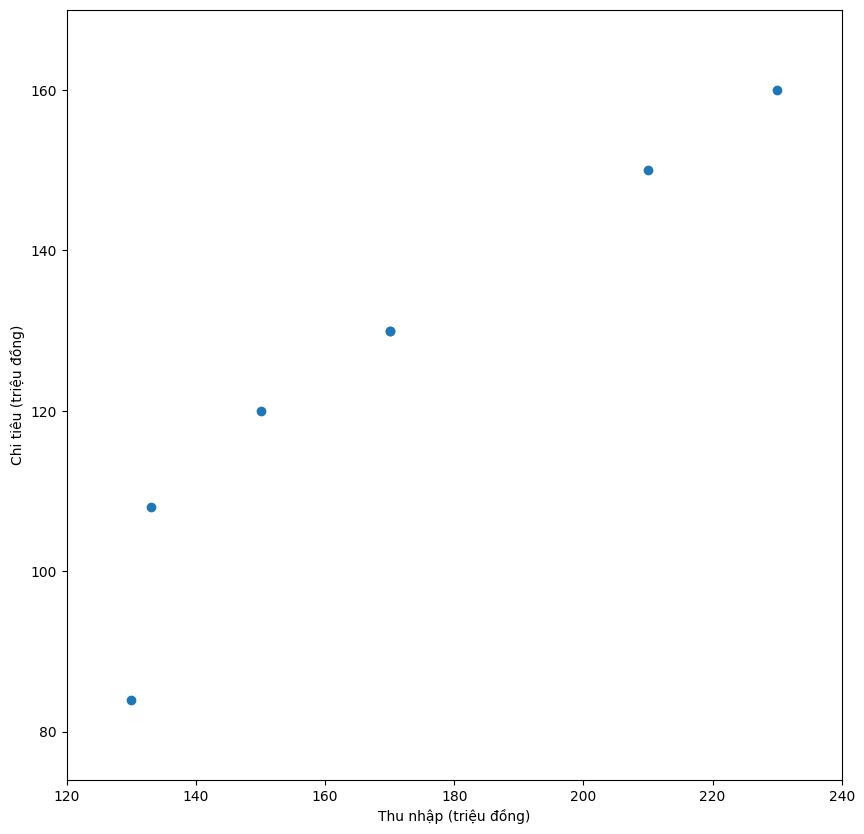

[[1.         0.94705241]
 [0.94705241 1.        ]]


In [132]:
# KIỂM TRA TÍNH TƯƠNG QUAN
# Bằng đồ thị : 
X = np.array([130, 150, 133, 170, 170, 210, 230])
y = np.array([84, 120, 108, 130, 130, 150, 160])
plt.figure(figsize=(10, 10))
plt.plot(X, y, 'o')
plt.axis([120, 240, 74, 170])
plt.xlabel('Thu nhập (triệu đồng)')
plt.ylabel('Chi tiêu (triệu đồng)')
plt.show()

# Bằng hệ số tương quan :
# np.corrcoef(X, y)
print(np.corrcoef(X, y))

Ta thấy hệ số tương quan là: __0.94705__ cho thấy 2 biến X, y có tương quan tuyến tính mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến X, y

In [133]:
# XÂY DỰNG MÔ HÌNH TUYẾN TÍNH : 
# Cách 1 :  Tính theo công thức
tu = sum((X - X.mean()) * (y - y.mean()))
print(tu)

mau = sum((X - X.mean())**2)
print(mau)

b1 = tu / mau
print("b1 =", b1)

b0 = y.mean() - b1 * X.mean()
print("b0 =", b0)

print(f"Mô hình hồi quy: y = {b0.round(4)} + {b1.round(4)} * x")

5466.0
8567.714285714286
b1 = 0.6379764564644679
b0 = 17.270583919698552
Mô hình hồi quy: y = 17.2706 + 0.638 * x


In [134]:
# XÂY DỰNG MÔ HÌNH TUYẾN TÍNH : 
# Cách 2 :  Sử dụng thư viện
model = sm.formula.ols('y ~ X', data = {'X': X, 'y': y}).fit()
print(model.summary())
print(model.params)
print(f"Mô hình hồi quy: y = {model.params[0].round(4)} + {model.params[1].round(4)} * x")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     43.50
Date:                Mon, 08 Apr 2024   Prob (F-statistic):            0.00120
Time:                        16:50:27   Log-Likelihood:                -24.099
No. Observations:                   7   AIC:                             52.20
Df Residuals:                       5   BIC:                             52.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2706     16.829      1.026      0.3

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Admin\AppData\Local\Temp\ipykernel_17352\2133124647.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Mô hình hồi quy: y = {model.params[0].round(4)} + {model.params[1].round(4)} * x")


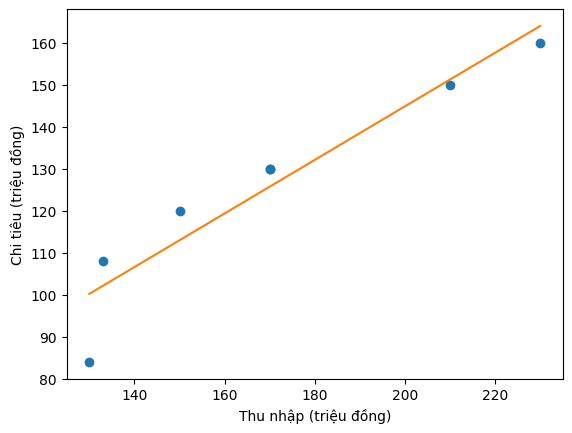

In [135]:
# VẼ MÔ HÌNH :
x0 = X.min()
y0 = b0 + b1*x0 

x1 = X.max()
y1 = b0 + b1*x1

plt.plot(X, y, 'o')
plt.plot([x0, x1], [y0, y1])

plt.xlabel("Thu nhập (triệu đồng)")
plt.ylabel("Chi tiêu (triệu đồng)")
plt.show()

In [136]:
# ĐÁNH GIÁ MÔ HÌNH :
print("R^2 = ", model.rsquared)
print("Mô hình đã xây dựng là mô hình tốt (R^2 > 0.8)")

R^2 =  0.8969082590110036
Mô hình đã xây dựng là mô hình tốt (R^2 > 0.8)


In [137]:
# DỰ BÁO : 
model.predict(exog = dict(X = 200)) # Dự báo chi tiêu khi thu nhập là 170 triệu đồng
# model.predict(exog=dict(X = [178, 180, 181])) # Dự báo chi tiêu khi thu nhập lần lượt là 178, 180, 181 triệu đồng

0    144.865875
dtype: float64

### Bài 2

Tiến hành nghiên cứu mối quan hệ giữa:

- X: giá bán kẻ của thịt gà (nghìn/kg) 
- Y: lượng thịt gà tiêu thụ (kg/tháng)

Dữ liệu thu được gồm 10 tháng như sau:

| X            | 35       | 40       | 45       | 40       | 38       | 40       | 45       | 30       | 42       | 38       |
| :----------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **2.29** | **2.04** | **0.59** | **2.06** | **2.50** | **2.32** | **1.57** | **3.96** | **1.43** | **2.34** |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính lượng tiêu thụ thịt gà theo giá bán.

b. Dự đoán lượng tiêu thụ khi giá bán lẻ là 41(kg/tháng)

In [138]:
X = np.array([35, 40, 45, 40, 38, 40, 45, 30, 42, 38])
y = np.array([2.29, 2.04, 0.59, 2.06, 2.50, 2.32, 1.57, 3.96, 1.43, 2.34])

np.corrcoef(X, y)

array([[ 1.        , -0.91953287],
       [-0.91953287,  1.        ]])

Ta thấy hệ số tương quan ($|r_{xy}|$) là: __0.91953__ cho thấy 2 biến x, y có tương quan tuyến tính mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến x, y

In [139]:
# print(model.summary())
print(model.params)
b0 = model.params[0]
b1 = model.params[1]
print(f"Mô hình hồi quy: y = {b0.round(4)} + {b1.round(4)}x")

Intercept    17.270584
X             0.637976
dtype: float64
Mô hình hồi quy: y = 17.2706 + 0.638x


C:\Users\Admin\AppData\Local\Temp\ipykernel_17352\3425994674.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0 = model.params[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_17352\3425994674.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1 = model.params[1]


30 36.409877613632595
45 45.979524460599606


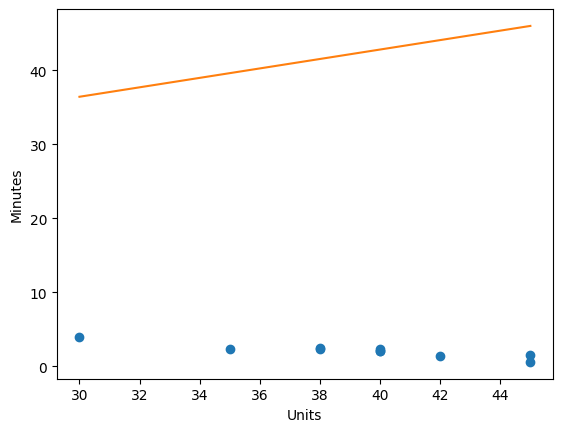

In [140]:
# VẼ MÔ HÌNH : 
x0 = X.min()
y0 = b0 + b1*x0

x1 = X.max()
y1 = b0 + b1*x1

print(x0, y0)
print(x1, y1)

plt.plot(X, y, 'o')
plt.plot([x0, x1], [y0, y1])

plt.xlabel('Units')
plt.ylabel('Minutes')
plt.show()

In [141]:
# ĐÁNH GIÁ
print('Hệ số xác định mô hình: ', model.rsquared)
print("Mô hình đã xây dựng là mô hình tốt (R^2 > 0.8)")

Hệ số xác định mô hình:  0.8969082590110036
Mô hình đã xây dựng là mô hình tốt (R^2 > 0.8)


In [142]:
# DỰ DOÁN
model.predict(exog=dict(x=41))

0    100.207523
1    112.967052
2    102.121453
3    125.726582
4    125.726582
5    151.245640
6    164.005169
dtype: float64

### Bài 3

Dụa trên file dữ liệu `Advertising.csv` bạn hãy dự đoán doanh số bán hàng (`sales`) dựa trên số tiền chi cho các nền tảng tiếp thị khác nhau như `TV`, `Radio` và `Newspaper`

a. Đọc file dữ liệu cho biết các thông tin cơ bản về dữ liệu: kích thước, dữ liệu có giá trị trống hay không, hiện các giá trị thống kê cơ bản của các thuộc tính.

b. Để dự đoán doanh số bằng phương pháp hồi quy tuyến tính đơn giản (Simple Linear Regression) trước tiên cần lựa chọn một trong các thuộc tính còn lại. Theo bạn thuộc tính nào phù hợp để xây dựng mô hình hồi quy. Giải thích và minh họa bằng 2 cách

c. Xây dụng phương trình hồi quy, trực quan mô hình (đường thẳng) tìm được. Theo bạn để đánh giá mô hình trên cần dùng đại lượng nào?

---

In [143]:
import pandas as pd

# Đọc file dữ liệu
df = pd.read_csv('Advertising.csv')

# Kích thước dữ liệu
print(f"Kích thước dữ liệu: {df.shape}")

# Kiểm tra giá trị trống
print(f"Dữ liệu có giá trị trống: {df.isnull().values.any()}")

# Thống kê cơ bản
print(df.describe())


Kích thước dữ liệu: (200, 5)
Dữ liệu có giá trị trống: False
       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [144]:
# Tính hệ số tương quan
correlation = df.corr()

# Hiển thị hệ số tương quan
print(correlation)

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000


Hệ số tương quan giữa Sales và TV cao nhất (0.782224), cho thấy mối tương quan mạnh giữa hai biến.
Hệ số tương quan giữa Sales và Radio và Newspaper thấp hơn.

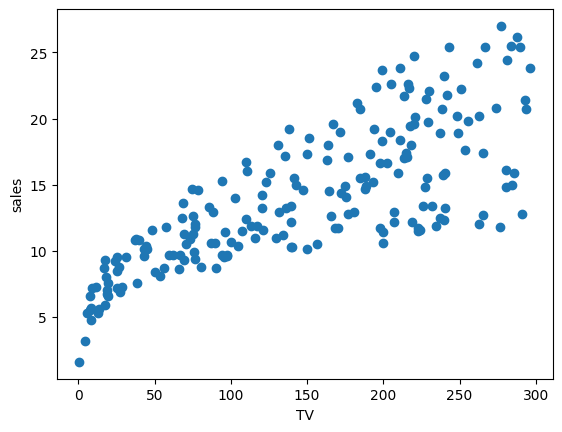

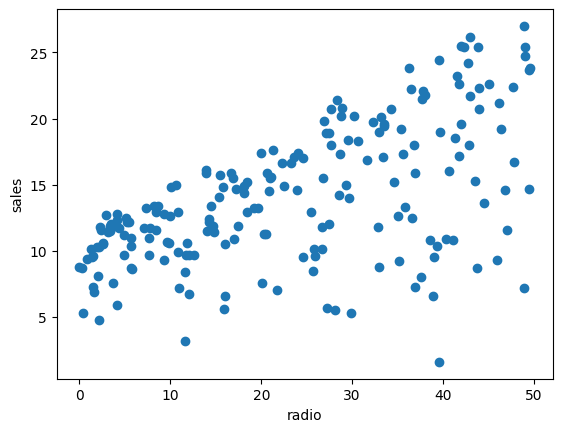

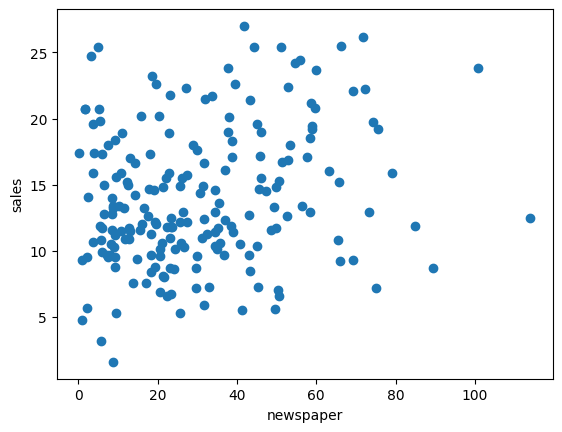

In [145]:
plt.scatter(df['TV'], df['sales'])
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()


plt.scatter(df['radio'], df['sales'])
plt.xlabel('radio')
plt.ylabel('sales')
plt.show()


plt.scatter(df['newspaper'], df['sales'])
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.show()

In [146]:
# c. Xây dụng phương trình hồi quy, trực quan mô hình (đường thẳng) tìm được. Theo bạn để đánh giá mô hình trên cần dùng đại lượng nào?
X = df['TV']
y = df['sales']
model = sm.formula.ols('y ~ X', data = {'X': X, 'y': y}).fit()
# print(model.summary())
print(model.params)
b0 = model.params[0]
b1 = model.params[1]
print(f"Mô hình hồi quy: y = {b0.round(4)} + {b1.round(4)}x")

# Đánh giá mô hình với R-square :
print('Hệ số xác định mô hình: ', model.rsquared)

Intercept    7.032594
X            0.047537
dtype: float64
Mô hình hồi quy: y = 7.0326 + 0.0475x
Hệ số xác định mô hình:  0.611875050850071


C:\Users\Admin\AppData\Local\Temp\ipykernel_17352\1828030456.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0 = model.params[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_17352\1828030456.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1 = model.params[1]


0.7 7.065869197430809
296.4 21.122453773474746


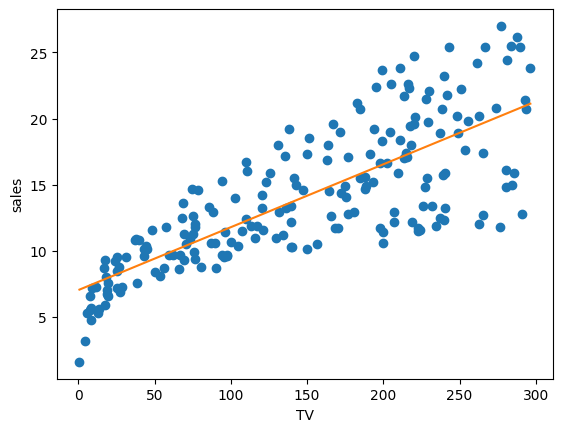

In [147]:
# VẼ MÔ HÌNH : 
x0 = X.min()
y0 = b0 + b1*x0

x1 = X.max()
y1 = b0 + b1*x1

print(x0, y0)
print(x1, y1)

plt.plot(X, y, 'o')
plt.plot([x0, x1], [y0, y1])

plt.xlabel('TV')
plt.ylabel('sales')
plt.show()